# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
import mglearn
X, y = mglearn.datasets.make_wave(n_samples=50)
print(X.shape, y.shape)

(50, 1) (50,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X_train.shape, X_test.shape)

(37, 1) (13, 1)


In [4]:
lr = LinearRegression().fit(X_train, y_train)
# underfitting issue
print('train accuracy : ', lr.score(X_train, y_train))
print('test accuracy : ', lr.score(X_test, y_test))

train accuracy :  0.5357782672614761
test accuracy :  0.6907303728080002


In [5]:
print('coef : ', lr.coef_)
print('intercept : ', lr.intercept_)

coef :  [0.41310844]
intercept :  -0.04830274377098531


# Multiple Linear Regression

In [6]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape, y.shape)

(506, 104) (506,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

# overfitting issue
print('train accuracy : ', lr.score(X_train, y_train))
print('test accuracy : ', lr.score(X_test, y_test))

train accuracy :  0.952051960903273
test accuracy :  0.6074721959665708


In [8]:
print('coef.shape : ', lr.coef_.shape)
print('intercept : ', lr.intercept_)

coef.shape :  (104,)
intercept :  30.934563673638145


# Regularization

## Ridge

In [9]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0).fit(X_train, y_train)
print('ridge training accuracy : ', clf.score(X_train, y_train))
print('ridge testing accuracy : ', clf.score(X_test, y_test))

ridge training accuracy :  0.885796658517094
ridge testing accuracy :  0.7527683481744755


In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

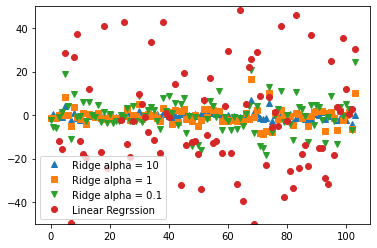

In [11]:
# Ridge alpha increase > coef decrease 
plt.plot(ridge10.coef_, '^', label='Ridge alpha = 10')
plt.plot(ridge1.coef_, 's', label='Ridge alpha = 1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha = 0.1')
plt.plot(lr.coef_, 'o', label='Linear Regrssion')
plt.ylim(-50, 50) # arrange y limit
plt.legend()

In [12]:
alphas = []
training_acuuracy = []
testing_accuracy = []

In [13]:
for i in range(100):
    alpha = i * 0.01
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    alphas.append(alpha)
    training_acuuracy.append(ridge.score(X_train, y_train))
    testing_accuracy.append(ridge.score(X_test, y_test))

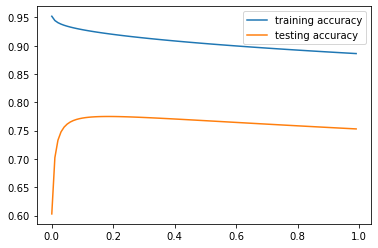

In [14]:
plt.plot(alphas, training_acuuracy, label = 'training accuracy')
plt.plot(alphas, testing_accuracy, label = 'testing accuracy')
plt.legend()

## Lasso

In [15]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=1.0).fit(X_train, y_train)
print('Lasso training accuracy : ', clf.score(X_train, y_train))
print('Lasso testing accuracy : ', clf.score(X_test, y_test))

Lasso training accuracy :  0.29323768991114607
Lasso testing accuracy :  0.20937503255272294


In [16]:
np.sum(clf.coef_ != 0)

4

In [17]:
lasso0001 = Lasso(alpha=0.001, max_iter = 100000).fit(X_train, y_train)
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)
lasso1 = Lasso(alpha=10).fit(X_train, y_train)

In [18]:
print('lasso alpha = 0.001 training accuracy : ', lasso0001.score(X_train, y_train))
print('lasso alpha = 0.001 testing accuracy : ', lasso0001.score(X_test, y_test))

lasso alpha = 0.001 training accuracy :  0.939282766590254
lasso alpha = 0.001 testing accuracy :  0.7386563657403369


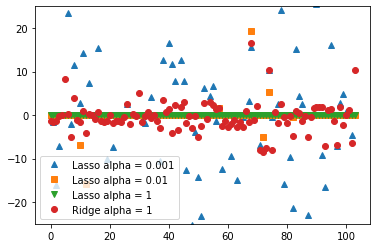

In [19]:
plt.plot(lasso0001.coef_, '^', label = 'Lasso alpha = 0.001')
plt.plot(lasso01.coef_, 's', label = 'Lasso alpha = 0.01')
plt.plot(lasso1.coef_, 'v', label = 'Lasso alpha = 1')
plt.plot(ridge1.coef_, 'o', label = 'Ridge alpha = 1')
plt.ylim(-25, 25)
plt.legend()

## ElasticNet

In [20]:
from sklearn.linear_model import ElasticNet
clf = ElasticNet(l1_ratio = 0.4, alpha = 1).fit(X_train, y_train)
print('ElasticNet training accuracy : ', clf.score(X_train, y_train))
print('ElasticNet testing accuracy : ', clf.score(X_test, y_test))

ElasticNet training accuracy :  0.34748093435694616
ElasticNet testing accuracy :  0.23241121316210478


In [21]:
alphas = [0.001, 0.01, 0.1, 1]
training_accuracy = []
testing_accuracy = []

In [22]:
for i in alphas:
    elas = ElasticNet(l1_ratio = 0.4, alpha = i, max_iter = 10000).fit(X_train, y_train)
    training_accuracy.append(elas.score(X_train, y_train))
    testing_accuracy.append(elas.score(X_test, y_test))

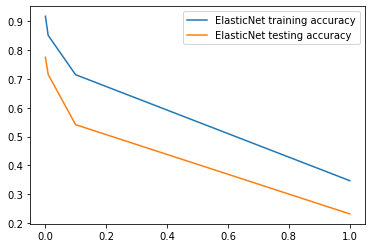

In [23]:
plt.plot(alphas, training_accuracy, label = 'ElasticNet training accuracy')
plt.plot(alphas, testing_accuracy, label = 'ElasticNet testing accuracy')
plt.legend()